In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import json
import requests
import os
import seaborn as sns

In [8]:
combined = pd.read_pickle('../node_and_degree_list.pkl')
combined.head

thresh = 1000
small = combined.loc[combined.followers_count < thresh]
small = small.loc[small.followers_count < thresh]

In [27]:
small.head()

,twitter_id,followers_count,following_count,label
24,4307623643,59,4,bot
36,844779426260791296,768,1,bot
83,837316817324556289,182,6,bot
137,913028718377005056,87,147,bot
175,790017240733278208,19,47,bot


In [10]:
# Compare each metric for each network
m = pd.read_pickle('feature_data/mentions.pkl')
l = pd.read_pickle('feature_data/likes.pkl')
f = pd.read_pickle('feature_data/follows.pkl')

In [47]:
plt_metrics = ['In Degree', 'Out Degree', 'Clustering Coefficient', 'PageRank', 
               'AM1 - In Degree', 'AM1 - Out Degree', 
              'AM2 - In Degree', 'AM2 - Out Degree']
metrics = m.columns[1:-1]
networks = ['mentions', 'likes', 'follows']
n = [m, l, f]
for net, d in zip(networks, n):
    for metric in metrics:
        d[metric] = d[metric].astype(float)


In [53]:
d

,twitter_id,indeg,outdeg,clustercoeff,pagerank,indeg_A1,outdeg_A1,indeg_A2,outdeg_A2,label
0,2861336274,963.0,3210.0,0.000228,0.151454,130.337447,0.0,0.294872,0.0,bot
0,3241838887,703.0,949.0,0.000003,0.216446,3.802535,0.0,0.318182,0.0,bot
0,1016773517587537920,31.0,13.0,0.000046,0.237823,102.248139,0.0,0.076923,0.0,bot
0,181549694,910.0,389.0,0.000033,0.263940,1.055455,0.0,0.285714,0.0,bot
0,43310150,866.0,871.0,0.000071,0.259004,242.023407,0.0,0.081081,0.0,bot
...,...,...,...,...,...,...,...,...,...,...
0,79103654,932.0,1772.0,0.000678,0.225865,12.610266,0.0,0.285714,0.0,human
0,422028358,798.0,323.0,0.000643,0.218111,0.641474,0.0,0.310345,0.0,human
0,226341562,851.0,448.0,0.001009,0.241581,0.888697,0.0,0.343750,0.0,human
0,1213081351,735.0,1994.0,0.003042,0.121340,16.466852,0.0,0.363636,0.0,human


In [63]:
d['label']

0      bot
0      bot
0      bot
0      bot
0      bot
     ...  
0    human
0    human
0    human
0    human
0    human
Name: label, Length: 451, dtype: object

In [69]:
d#.stack()

,twitter_id,indeg,outdeg,clustercoeff,pagerank,indeg_A1,outdeg_A1,indeg_A2,outdeg_A2,label
0,1005564252948582401,6.0,51.0,0.000000,0.500000,27.000000,0.823529,0.000000,1.000000,bot
0,300415996,746.0,671.0,0.000000,0.294142,0.246224,0.543738,0.121951,0.455696,bot
0,1030869656666599424,4.0,12.0,0.000000,0.350877,0.000000,4.916667,0.000000,0.000000,bot
0,1421859620,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,bot
0,976973737,703.0,1094.0,0.000003,0.236771,0.415528,0.262048,0.385542,0.105263,bot
...,...,...,...,...,...,...,...,...,...,...
0,456361810,67.0,187.0,0.000000,0.071510,1.791045,1.715559,0.142857,0.476190,human
0,957638029639913473,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,human
0,1054684530592878592,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,human
0,2197092790,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,human


In [70]:
tips = sns.load_dataset("tips")

mentions
likes
follows


<ipython-input-73-8a6901b391e2>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5, 3))


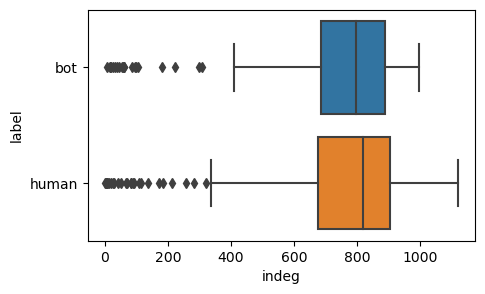

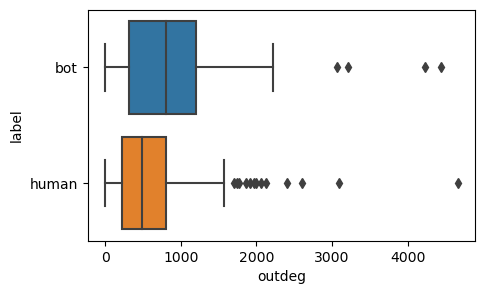

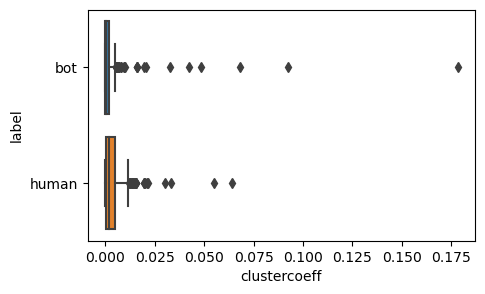

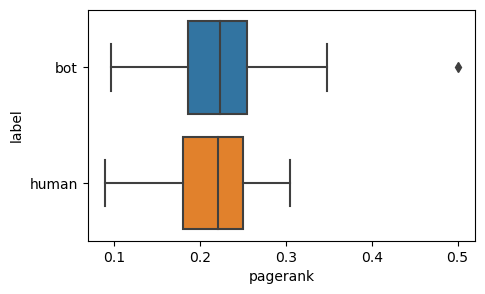

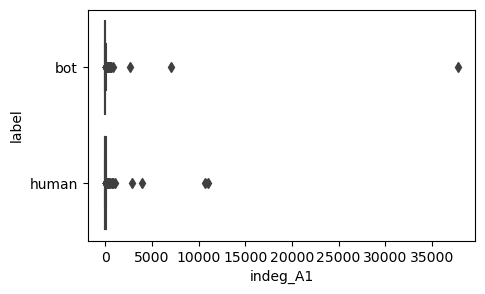

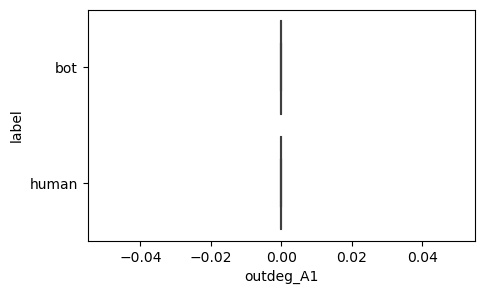

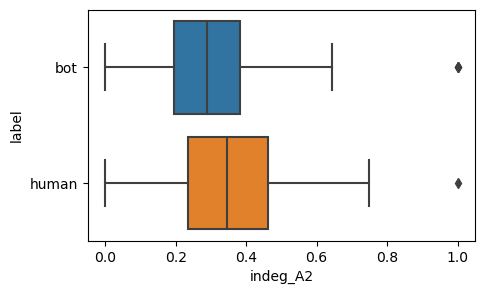

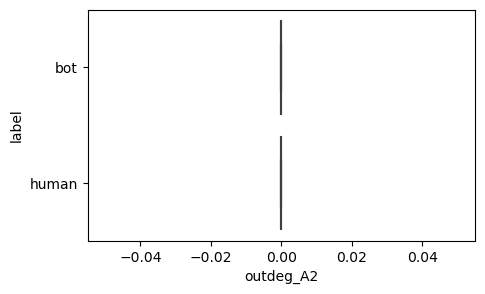

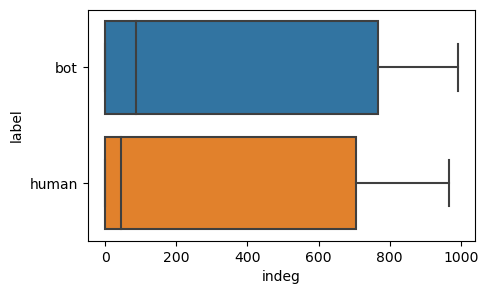

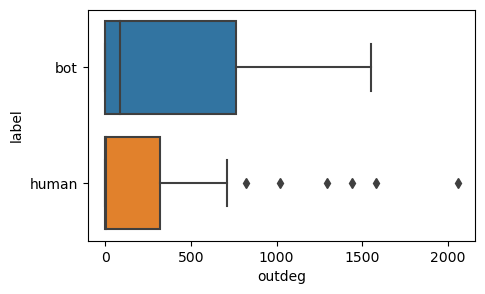

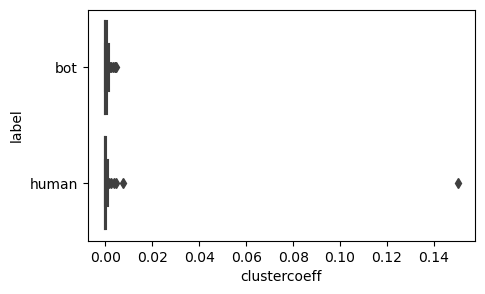

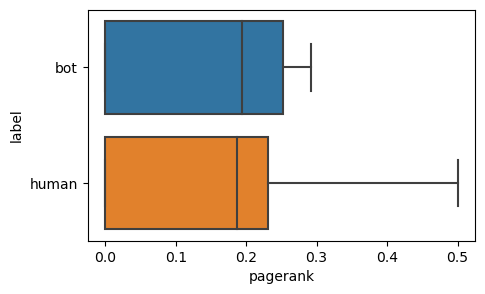

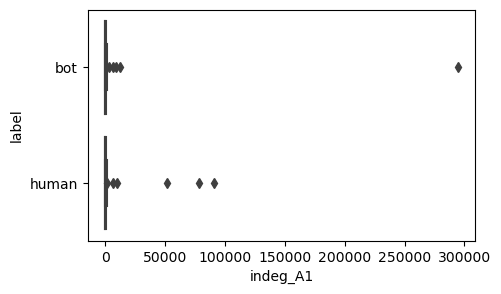

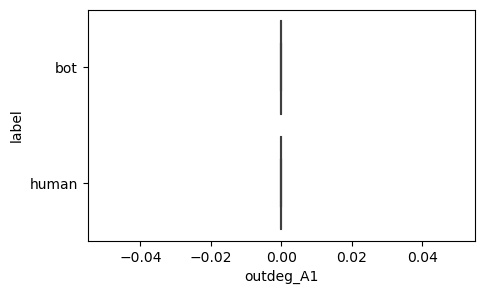

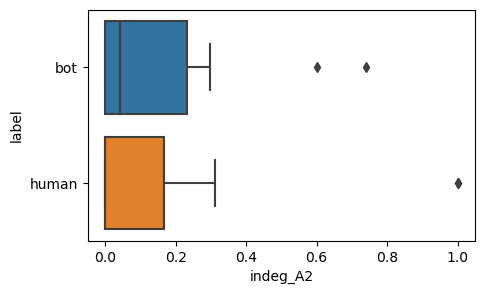

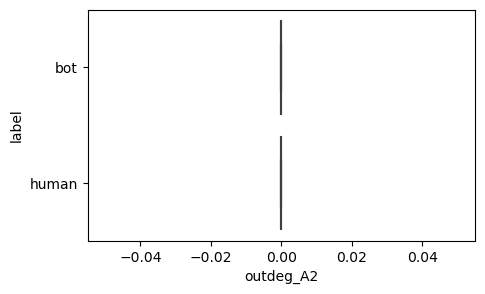

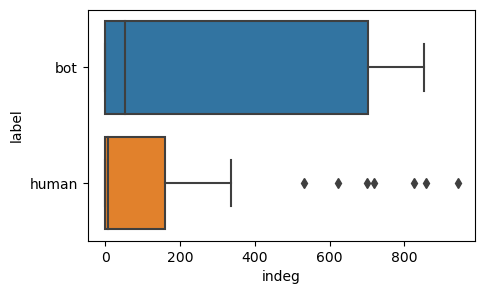

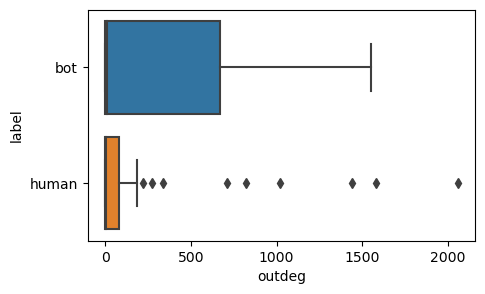

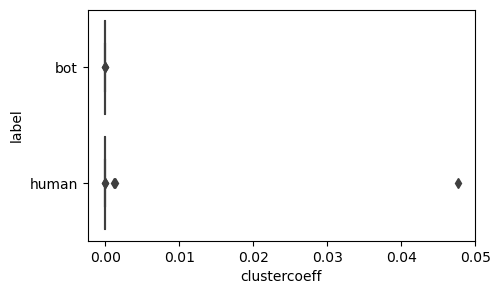

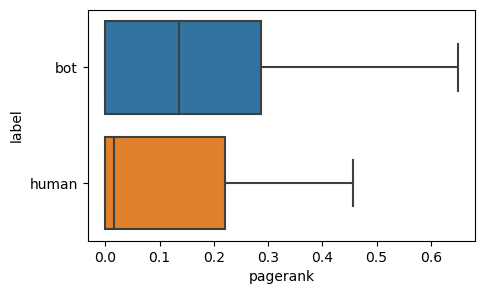

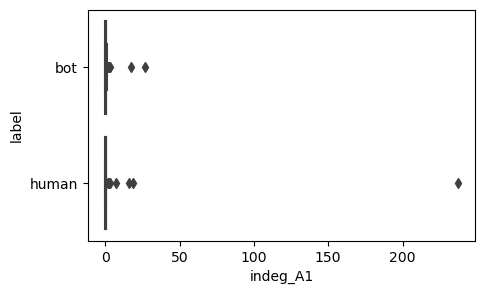

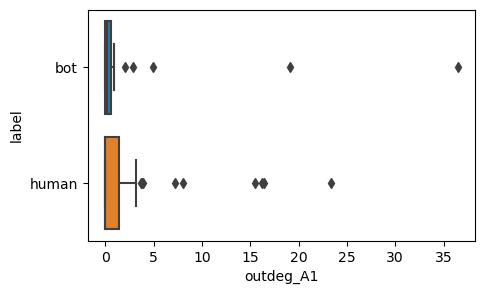

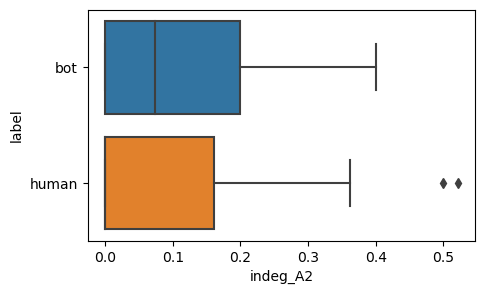

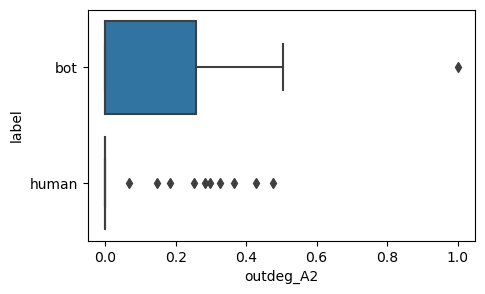

In [73]:
for net, d in zip(networks, n):
    print(net)
    for metric, name in zip(metrics,plt_metrics):
        plt.figure(figsize=(5, 3))
        sns.boxplot(x=d[metric], y=d['label'])
#         print('bot---')
#         print(d.loc[d.label == 'bot'].describe())
#         print('human---')
#         print(d.loc[d.label == 'human'].describe())
        

### Generate Figures

In [ ]:
bins = [20, 20, 5]

In [91]:
metrics

Index(['indeg', 'outdeg', 'clustercoeff', 'pagerank', 'indeg_A1', 'outdeg_A1',
       'indeg_A2', 'outdeg_A2'],
      dtype='object')

In [ ]:
plt.figure(figsize=(6, 6));
sns.histplot(m, x=metric, hue='label', bins=5, multiple="stack", stat='probability');

In [93]:
(d[metric].max() - d[metric].min()) / 10

0.1

<ipython-input-95-872d3fa790d4>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6, 6));


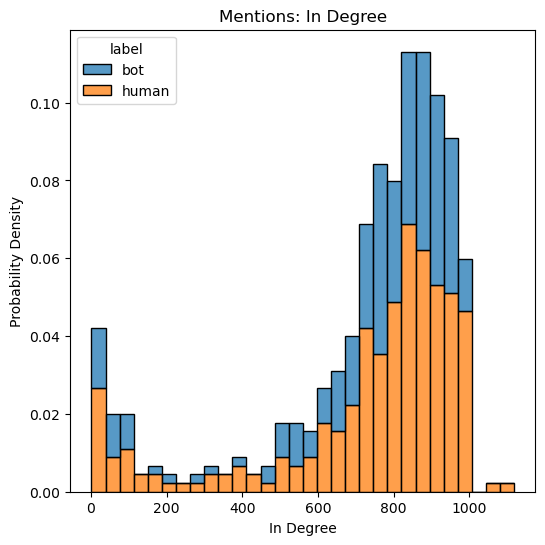

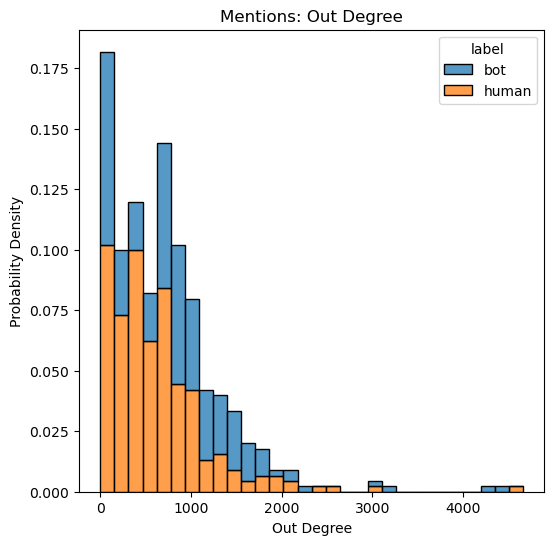

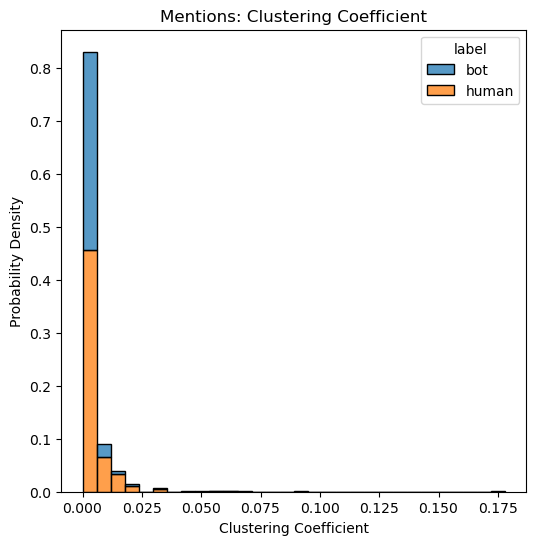

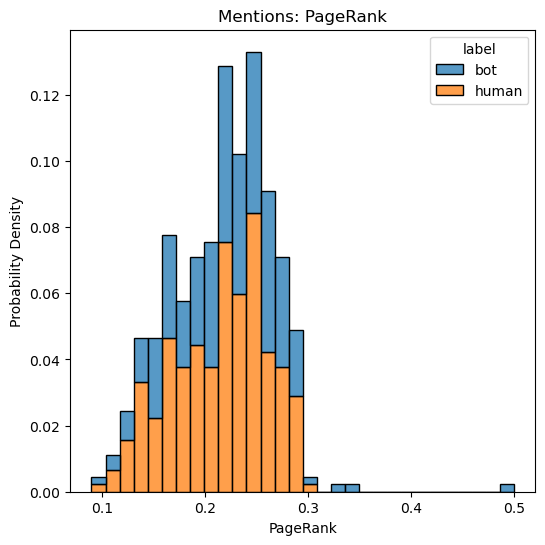

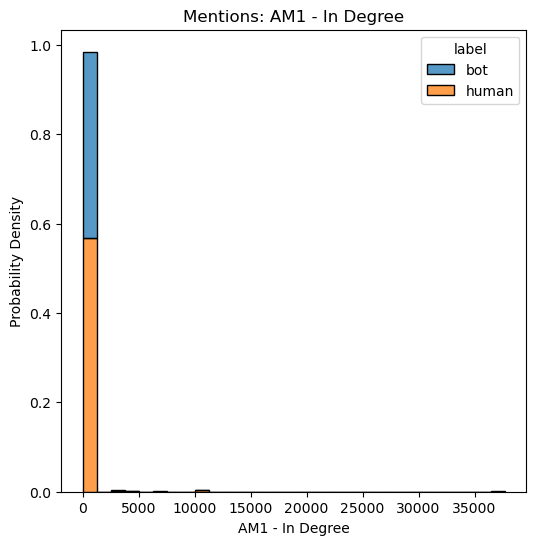

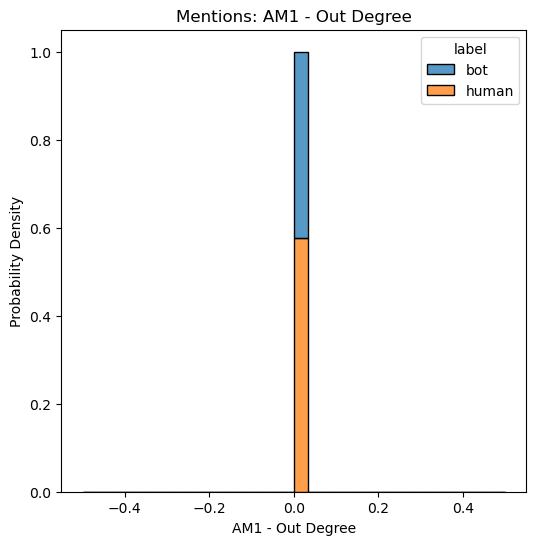

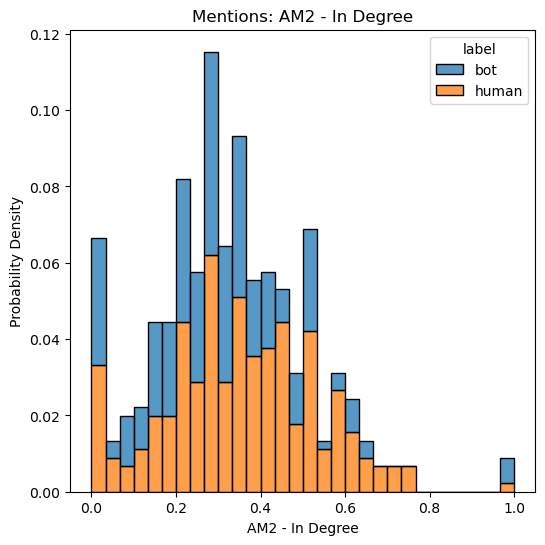

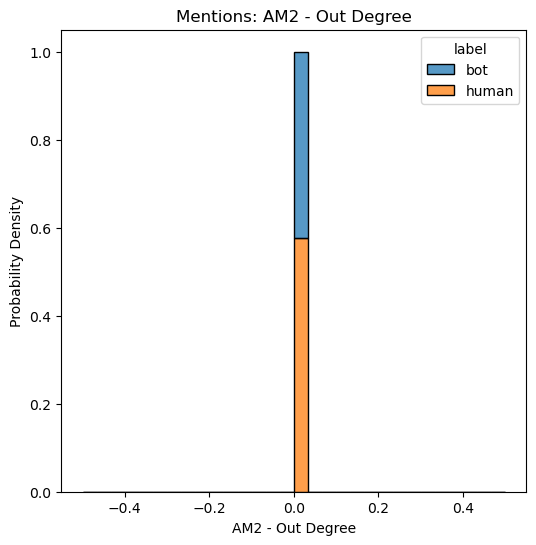

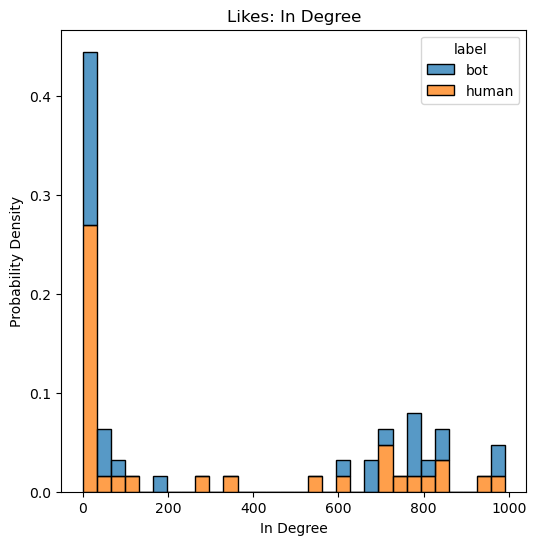

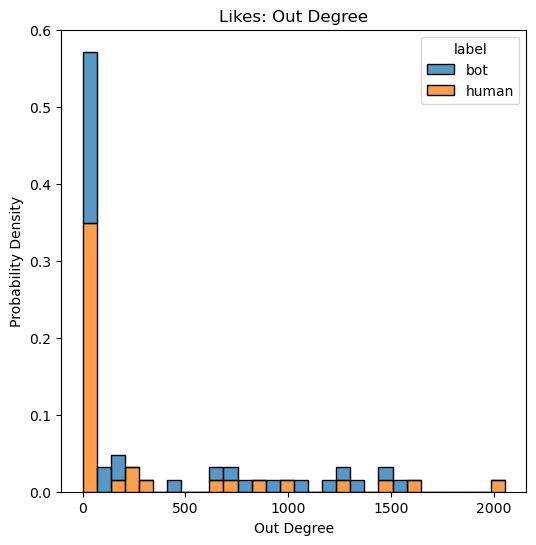

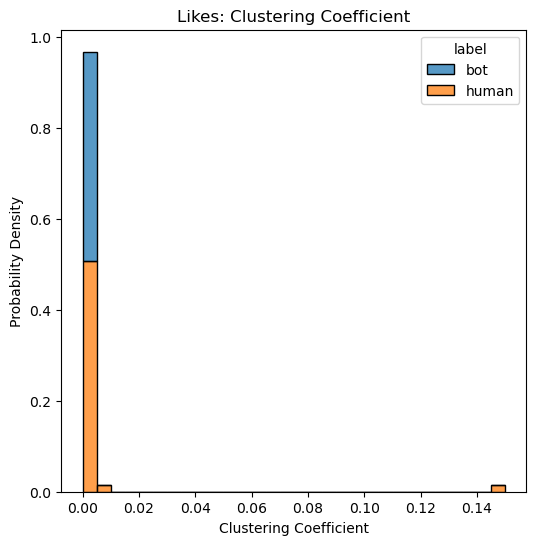

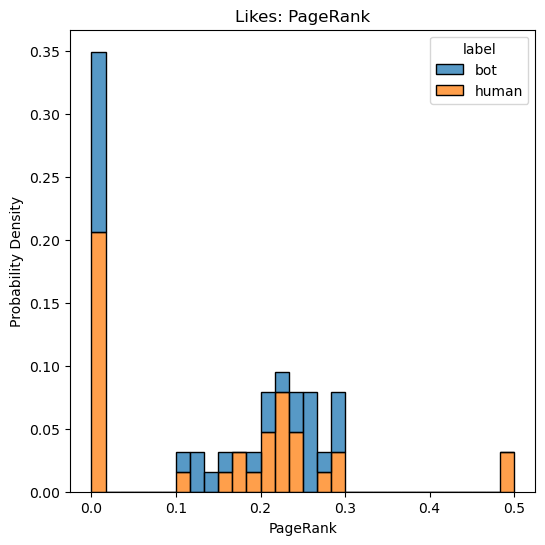

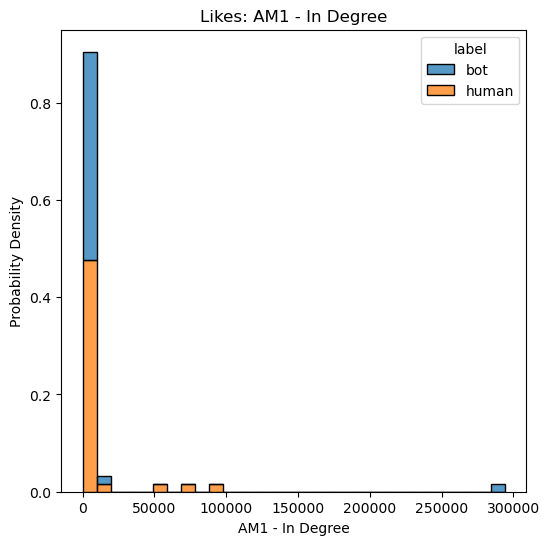

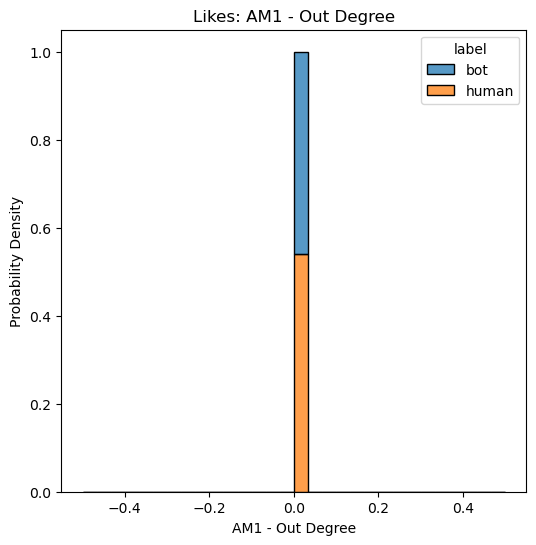

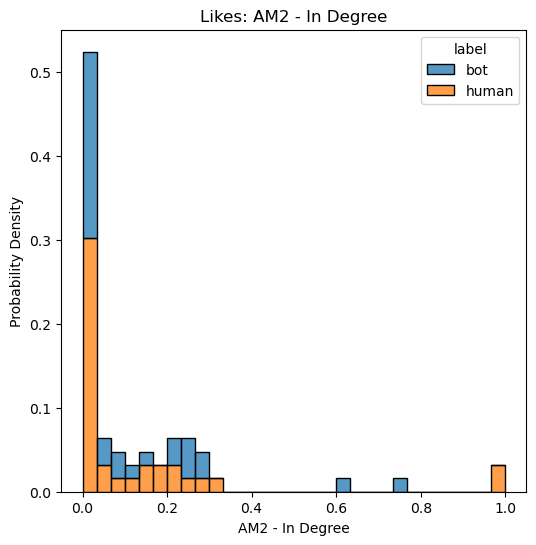

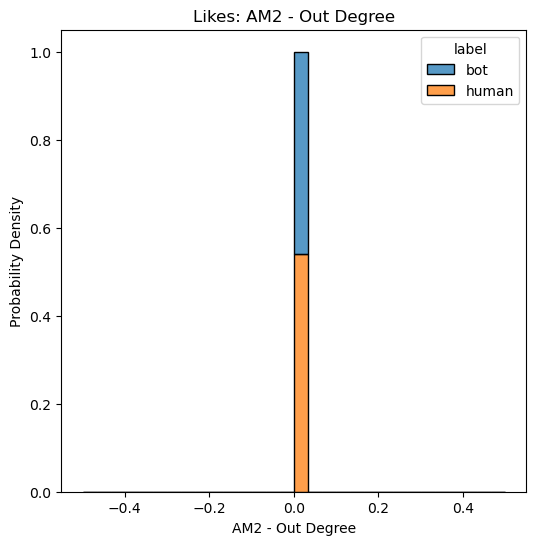

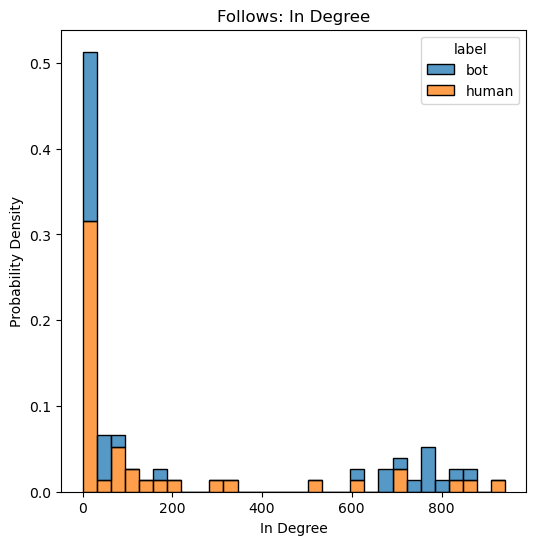

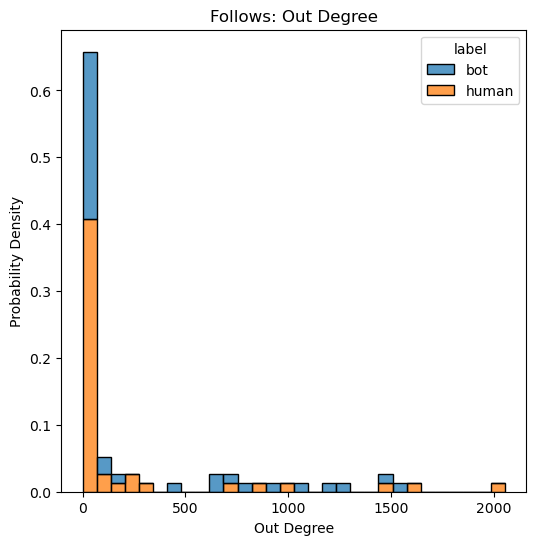

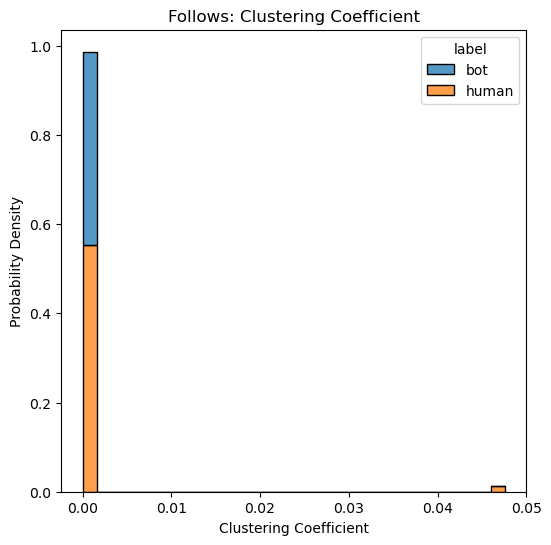

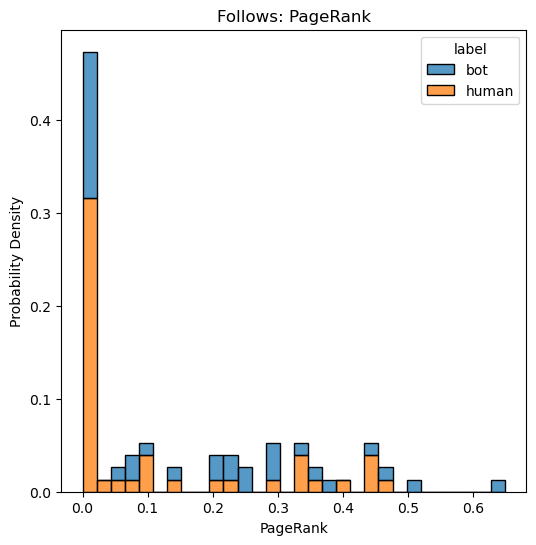

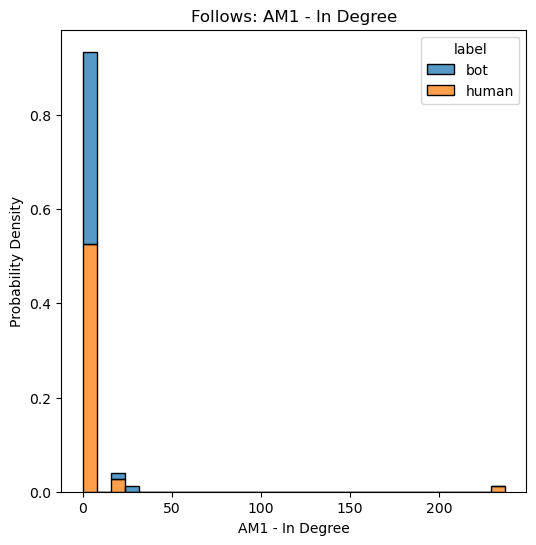

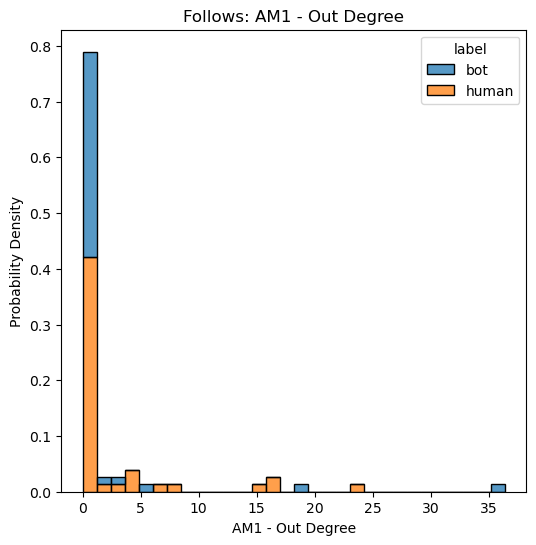

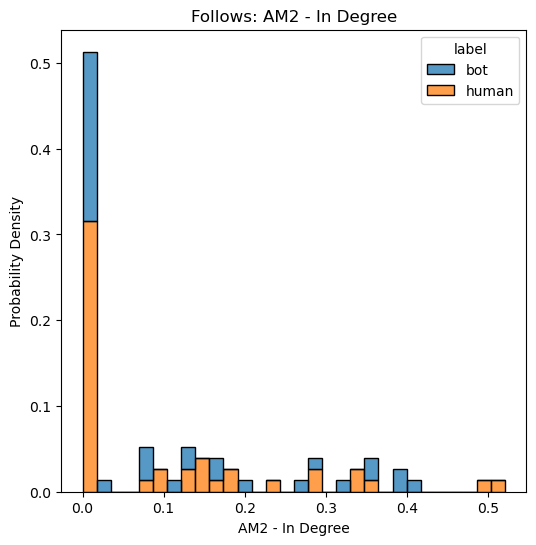

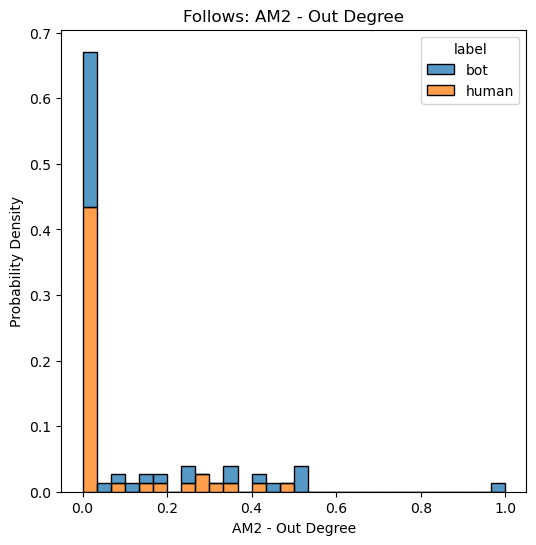

In [95]:
for net, d in zip(networks, n):
    for metric, name in zip(metrics,plt_metrics):
        plt.figure(figsize=(6, 6));
        sns.histplot(d, x=metric, hue='label', bins=30, multiple="stack", stat='probability');
        plt.title(net.capitalize() + ': ' + name)
        plt.xlabel(name)
        plt.ylabel('Probability Density')
        plt.savefig('figures/displot-' + net + '-' + metric)